# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [2]:
#!pip install palmerpenguins

In [3]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from palmerpenguins import load_penguins
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score

In [4]:
penguins = load_penguins()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [5]:
#USING ALL VARIABLES TO PREDICT BILL_DEPTH_MM
penguins = penguins.dropna()
X = penguins.drop("bill_depth_mm", axis = 1) #using all variables except bill_depth_mm
y = penguins["bill_depth_mm"] #1D just one column of ur y
X_train, X_test, y_train, y_test = train_test_split(X,y)

X_train

,species,island,bill_length_mm,flipper_length_mm,body_mass_g,sex,year
201,Gentoo,Biscoe,45.2,215.0,5300.0,male,2008
52,Adelie,Biscoe,35.0,190.0,3450.0,female,2008
277,Chinstrap,Dream,50.0,196.0,3900.0,male,2007
223,Gentoo,Biscoe,46.4,221.0,5000.0,male,2008
50,Adelie,Biscoe,39.6,186.0,3500.0,female,2008
...,...,...,...,...,...,...,...
92,Adelie,Dream,34.0,185.0,3400.0,female,2008
235,Gentoo,Biscoe,50.0,224.0,5350.0,male,2009
229,Gentoo,Biscoe,51.1,220.0,6000.0,male,2008
26,Adelie,Biscoe,40.6,183.0,3550.0,male,2007


In [6]:
#first step: prep data: one-hot-encode
#second step: model fitting - linear regressions
#this is a "recipe"

lr = LinearRegression() #make linear regression function
enc = OneHotEncoder() #get dummy variable ready

ct = ColumnTransformer(
    [("dummify_s", enc, ["species"]),
    ("dummify_i", enc, ["island"]),
    ("dummify_sex", enc, ["sex"])]
) #dummifying multiple columns, only one list of multiple columns

my_pipeline = Pipeline(
    [('dummify_everything', ct), ('ols', lr)] #labeling each step
) #run data through this pipeline to dummify and then run linear regression

In [7]:
fitted_my_pipeline = my_pipeline.fit(X_train, y_train)
fitted_my_pipeline

Pipeline(steps=[('dummify_everything',
                 ColumnTransformer(transformers=[('dummify_s', OneHotEncoder(),
                                                  ['species']),
                                                 ('dummify_i', OneHotEncoder(),
                                                  ['island']),
                                                 ('dummify_sex',
                                                  OneHotEncoder(), ['sex'])])),
                ('ols', LinearRegression())])

In [8]:
#USING ALL VARIABLES TO PREDICT BILL_DEPTH_MM
y_preds_all = fitted_my_pipeline.predict(X_test)
y_train_all = fitted_my_pipeline.predict(X_train)


r2_all_test = r2_score(y_test, y_preds_all)
r2_all_test

r2_all_train = r2_score(y_train, y_train_all)
r2_all_train

0.8270204894546155

Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Four different models, each containing a different set of predictor variables

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [9]:
#using ONLY BILL_LENGTH_MM to predict bill_depth_mm
X1 = penguins[["bill_length_mm"]] #X is still a dataframe, can have many columns
y1 = penguins["bill_depth_mm"] #1D just one column of ur y
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1,y1)

In [10]:
my_pipeline_1 = Pipeline(
    [('ols', lr)] #labeling each step
)

fitted_my_pipeline_1 = my_pipeline_1.fit(X_train1, y_train1)
fitted_my_pipeline_1

y_preds_1 = fitted_my_pipeline_1.predict(X_test1)
y_preds_1

r2_score(y_test1, y_preds_1)

0.06946359363334176

In [11]:
y_preds_1 = fitted_my_pipeline_1.predict(X_test1)
y_train_1 = fitted_my_pipeline_1.predict(X_train1)


r2_all_test1 = r2_score(y_test1, y_preds_1)
r2_all_test1

r2_all_train1 = r2_score(y_train1, y_train_1)
r2_all_train1

0.045211366365880745

In [12]:
#USING BILL_LENGTH_MM AND SPECIES AND ISLAND
#using ONLY BILL_LENGTH_MM to predict bill_depth_mm
X2 = penguins[["bill_length_mm", "species", "island"]] #X is still a dataframe, can have many columns
y2 = penguins["bill_depth_mm"] #1D just one column of ur y
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2)

In [13]:
ct2 = ColumnTransformer(
    [("dummify_s", enc, ["species"]),
    ("dummify_i", enc, ["island"])]
) #dummifying multiple columns, only one list of multiple columns

my_pipeline2 = Pipeline(
    [('dummify_everything', ct2), ('ols', lr)] #labeling each step
) #run data through this pipeline to dummify and then run linear regression

In [14]:
fitted_my_pipeline2 = my_pipeline2.fit(X_train2, y_train2)
fitted_my_pipeline2

y_preds_2 = fitted_my_pipeline2.predict(X_test2)
y_preds_2

r2_score(y_test2, y_preds_2)

0.618365844947566

In [15]:
y_preds_2 = fitted_my_pipeline2.predict(X_test2)
y_train_2 = fitted_my_pipeline2.predict(X_train2)


r2_all_test2 = r2_score(y_test2, y_preds_2)
r2_all_test2

r2_all_train2 = r2_score(y_train2, y_train_2)
r2_all_train2

0.6857424525148492

In [16]:
#USING BILL_LENGTH_MM, SPECIES, ISLAND, AND SEX
X3 = penguins[["bill_length_mm", "species", "island", "sex"]] #X is still a dataframe, can have many columns
y3 = penguins["bill_depth_mm"] #1D just one column of ur y
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3,y3)

In [17]:
ct3 = ColumnTransformer(
    [("dummify_s", enc, ["species"]),
    ("dummify_i", enc, ["island"]),
     ("dummify_i", enc, ["sex"])]
) #dummifying multiple columns, only one list of multiple columns

my_pipeline3 = Pipeline(
    [('dummify_everything', ct2), ('ols', lr)] #labeling each step
) #run data through this pipeline to dummify and then run linear regression

In [18]:
fitted_my_pipeline_3 = my_pipeline3.fit(X_train3, y_train3)
fitted_my_pipeline_3

y_preds_3 = fitted_my_pipeline_3.predict(X_test3)
y_preds_3

r2_score(y_test3, y_preds_3)

0.6617954800606638

In [19]:
y_preds_3 = fitted_my_pipeline_3.predict(X_test3)
y_train_3 = fitted_my_pipeline_3.predict(X_train3)


r2_all_test3 = r2_score(y_test3, y_preds_3)
r2_all_test3

r2_all_train3 = r2_score(y_train3, y_train_3)
r2_all_train3

0.678525536371036

In [20]:
model_num = [1, 2, 3, 4]
num_predictors = [7, 1, 3, 4]
r2_test = [r2_all_test, r2_all_test1, r2_all_test2, r2_all_test3]
r2_train = [r2_all_train, r2_all_train1, r2_all_train2, r2_all_train3]

df = pd.DataFrame({"model": model_num,
                   "num_predictors": num_predictors,
                   "r2_test": r2_test,
                   "r2_train": r2_train})
df

,model,num_predictors,r2_test,r2_train
0,1,7,0.809304,0.827020
1,2,1,0.069464,0.045211
2,3,3,0.618366,0.685742
3,4,4,0.661795,0.678526


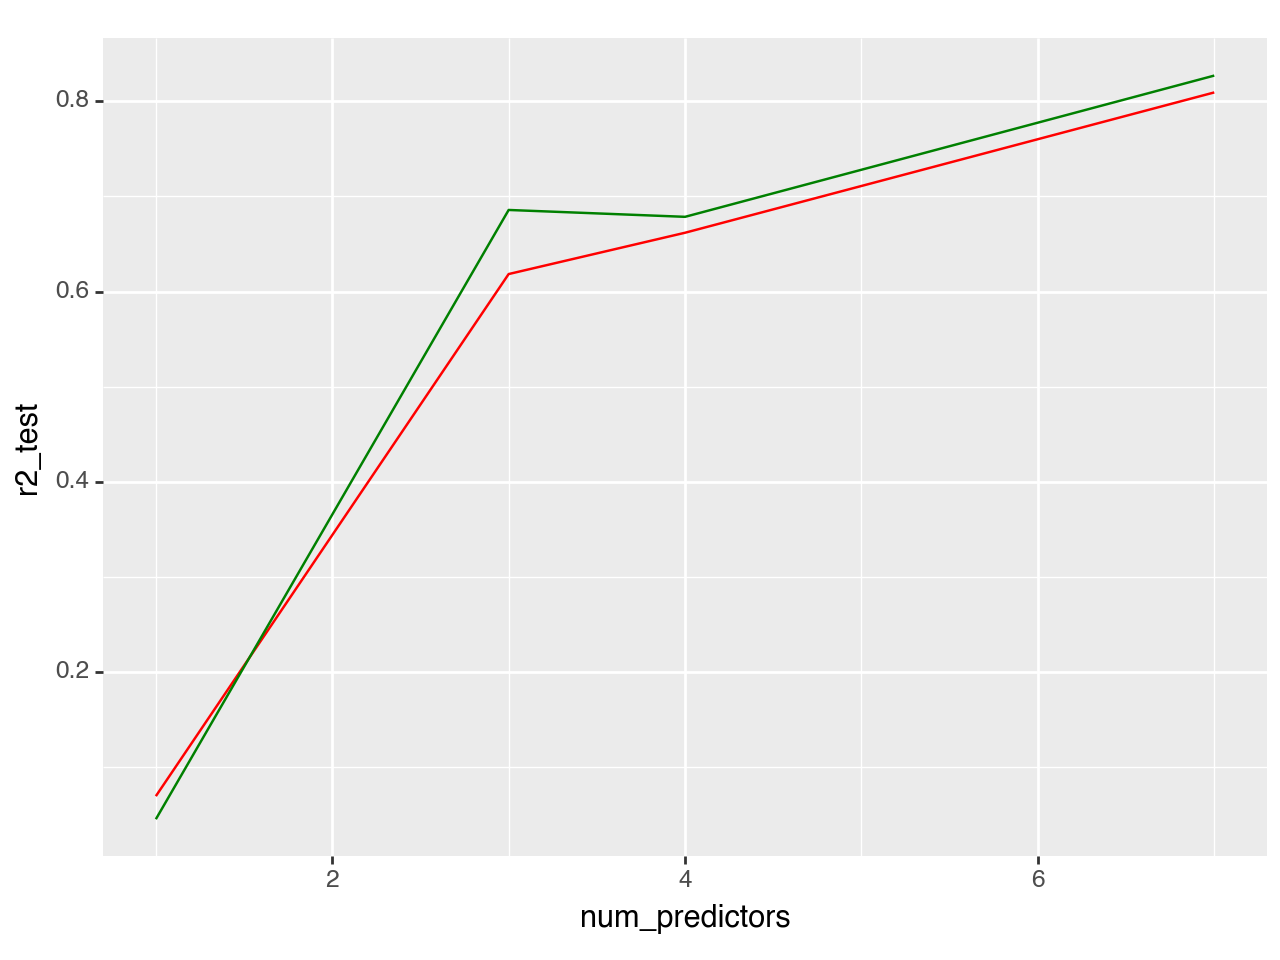

<Figure Size: (640 x 480)>

In [21]:
from plotnine import *
(ggplot(df, aes(x = "num_predictors", y = "r2_test"))
+ geom_line(color = "red")
+ geom_line(aes(y = "r2_train"), color = "green")
)

As the number of explanatory variables increase, R^2 increases as well. Thus, model 1, where there are 7 explanatory variables, is the better model. The R^2 values between the testing and training models are very similar as well.